2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations

In [29]:
import numpy as np
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print('with outer function\n',(np.outer(u,v)))
print('with list comprehension\n', np.array([i*j for i in u for j in v]).reshape(4,4))
print('using broadcast operation\n', np.tile(u,(4,1)).T*v)

with outer function
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
with list comprehension
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
using broadcast operation
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]
 [1 3 5 7]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[6.28318531 5.64852012 5.01385494 4.37918976 3.74452458 3.10985939
 2.47519421 1.84052903 1.20586385 0.57119866]
[0.76159822 0.82506474 3.87145761 3.93492413]
sin(x) and cos(x) in the interval [0,2*pi] are close at x=[0.76159822 0.82506474 3.87145761 3.93492413]


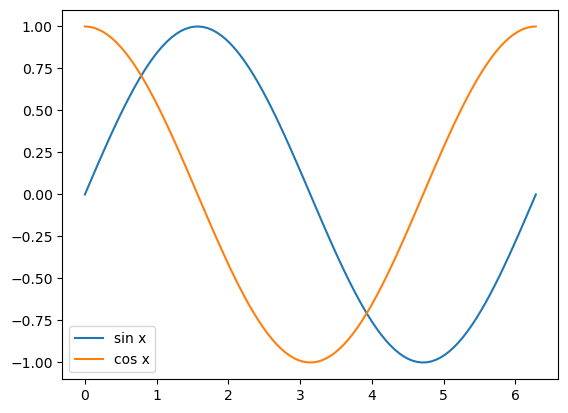

In [40]:
import numpy as np
a=np.linspace(0,2*np.pi,100)
ext=a[9::10]
ext=ext[::-1]
print(ext)
b=np.array([i for i in a if abs(np.cos(i)-np.sin(i))<0.1])
print(b)
import matplotlib.pyplot as plt
plt.plot(a,np.sin(a),label='sin x')
plt.plot(a,np.cos(a),label='cos x')
plt.legend()
print(f'sin(x) and cos(x) in the interval [0,2*pi] are close at x={b}')

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [134]:
m=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
m_prime=np.tile(m,(len(m),1)).T
print(m_prime)
dist=np.abs(m_prime-m)
print('distances in miles\n',dist)
print('distances in km\n',(dist*1.609).astype(int))

[[   0    0    0    0    0    0    0    0    0    0]
 [ 198  198  198  198  198  198  198  198  198  198]
 [ 303  303  303  303  303  303  303  303  303  303]
 [ 736  736  736  736  736  736  736  736  736  736]
 [ 871  871  871  871  871  871  871  871  871  871]
 [1175 1175 1175 1175 1175 1175 1175 1175 1175 1175]
 [1475 1475 1475 1475 1475 1475 1475 1475 1475 1475]
 [1544 1544 1544 1544 1544 1544 1544 1544 1544 1544]
 [1913 1913 1913 1913 1913 1913 1913 1913 1913 1913]
 [2448 2448 2448 2448 2448 2448 2448 2448 2448 2448]]
distances in miles
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 104

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

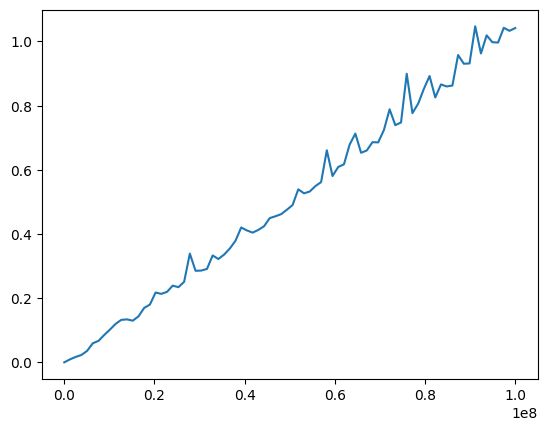

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pr_num(n):
    mask=np.ones(n+1, dtype=bool)
    mask[0:2]=False
    for i in range(2,int(np.sqrt(n)+1)):
        if mask[i]==True:
            mask[i*i::i]=False
    return np.nonzero(mask)[0]
pr_num(100)

import timeit
import matplotlib.pyplot as plt
seq=np.linspace(1,int(1e8),80)
times=[timeit.timeit(lambda : pr_num(int(i)), number=1) for i in seq]
plt.plot(seq,times)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[ -1   0   1 ...  24  25  26]
 [ -1   0  -1 ...  -6  -7  -8]
 [  1   0  -1 ...   0  -1   0]
 ...
 [ -1   0   1 ...   0   1   2]
 [  1   2   3 ...  -8  -9 -10]
 [ -1  -2  -3 ... -10 -11 -10]]
[[  1   0   1 ... 576 625 676]
 [  1   0   1 ...  36  49  64]
 [  1   0   1 ...   0   1   0]
 ...
 [  1   0   1 ...   0   1   4]
 [  1   4   9 ...  64  81 100]
 [  1   4   9 ... 100 121 100]]
[  1.   2.   3.   4.   5.   6.   7.   8.   9.   9.  10.  11.  13.  13.
  14.  15.  16.  17.  18.  19.  20.  22.  23.  24.  26.  27.  28.  29.
  30.  31.  31.  32.  33.  34.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  46.  48.  50.  51.  52.  53.  54.  55.  56.  57.  57.
  58.  60.  60.  61.  63.  65.  67.  67.  69.  70.  72.  73.  74.  75.
  77.  77.  79.  79.  79.  80.  80.  82.  84.  85.  86.  88.  89.  90.
  93.  94.  95.  96.  96.  97.  98. 100. 101. 102. 102. 104. 105. 107.
 107. 109. 109. 111. 111. 113. 113. 114. 115. 117. 119. 119. 119. 120.
 121. 123. 124. 125. 126. 128. 129. 131. 132. 13

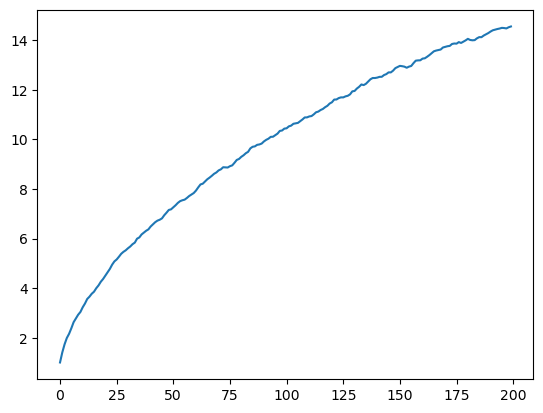

In [142]:
import numpy as np
import matplotlib.pyplot as plt
np.printoptions(precision=2)
a=np.random.choice([-1,1],(1000,200))
dist=np.cumsum(a,axis=1)
print(dist)
sq_dist=dist**2
print(sq_dist)
mean=np.mean(sq_dist,axis=0)
print(mean)
plt.plot(np.arange(200),np.sqrt(mean))

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]
hares:
DescribeResult(nobs=21, minmax=(7600.0, 77400.0), mean=34080.95238095238, variance=458558619.0476191, skewness=0.8707926603586706, kurtosis=-0.4713852285780282)

lynxes:
DescribeResult(nobs=21, minmax=(4000.0, 59400.0), mean=20166.666666666668, variance=277422333.3333333, skewness=1.122094055331874, kurtosis=-0.11206718692648243)

carrots:

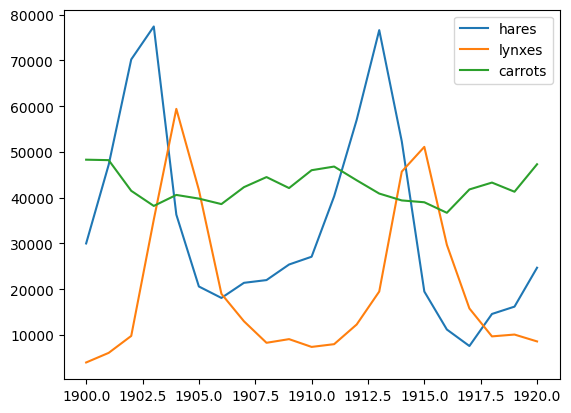

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data=np.genfromtxt('/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/populations.txt')
print(data)
years,hares,lynxes,carrots=data.T
plt.plot(years,hares,label='hares')
plt.plot(years,lynxes,label='lynxes')
plt.plot(years,carrots,label='carrots')
plt.legend()
from scipy.stats import describe
print(f'hares:\n{describe(hares)}\n')
print(f'lynxes:\n{describe(lynxes)}\n')
print(f'carrots:\n{describe(carrots)}\n')

In [12]:
species=['hares','linxes','carrots']
print('Species with the highest population each year:')
for i in range(len(data)):
    print(int(data[i,0]),':\t',species[np.argmax(data[i,1:])])

Species with the highest population each year:
1900 :	 carrots
1901 :	 carrots
1902 :	 hares
1903 :	 hares
1904 :	 linxes
1905 :	 linxes
1906 :	 carrots
1907 :	 carrots
1908 :	 carrots
1909 :	 carrots
1910 :	 carrots
1911 :	 carrots
1912 :	 hares
1913 :	 hares
1914 :	 hares
1915 :	 linxes
1916 :	 carrots
1917 :	 carrots
1918 :	 carrots
1919 :	 carrots
1920 :	 carrots


4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [15]:
file_name='/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/credit_card.dat'
card_list=[]
with open(file_name,mode='r') as f:
    for line in f:
        card_num=''
        for i in [i*6 for i in range(len(line)//6)]:
            y=line[i:i+6]
            card_num+=chr(int(y,2))
        if card_num =='':
            continue
        card_list.append(card_num)
print(card_list)

['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [10]:
#PART 1
import numpy as np
import pandas as pd
file_name='/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/data_000637.txt'
df=pd.read_csv(file_name)
df1=df.sample(15000).sort_index()
df1


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
54,1,1,61,3869200168,260,16
77,1,1,2,3869200168,1449,12
108,1,0,10,3869200168,1674,22
205,1,0,62,3869200169,1331,4
302,1,1,10,3869200170,2461,29
...,...,...,...,...,...,...
1310151,1,0,64,3869211167,1157,20
1310296,1,1,5,3869211168,906,14
1310402,1,0,139,3869211169,738,0
1310565,1,0,58,3869211170,108,23


In [15]:
#PART 2
x=df.BX_COUNTER.max()+1
print(f'x={x}')

x=3564


In [20]:
#PART 3-4
df['TIME']=df.BX_COUNTER*25+df.TDC_CHANNEL*25/30+df.ORBIT_CNT*25*x
print(f'Time for taking data:\t {df.TIME.max()-df.TIME.min()} ns')

Time for taking data:	 980416288.3125 ns


In [27]:
#PART 5
df.HEAD=np.random.choice([0,1],df.shape[0])
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


In [28]:
#PART 6
df2=df[df.HEAD==1]
df2

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
...,...,...,...,...,...,...,...
1310708,1,0,124,3869211171,199,9,3.447467e+14
1310710,1,1,36,3869211171,427,13,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


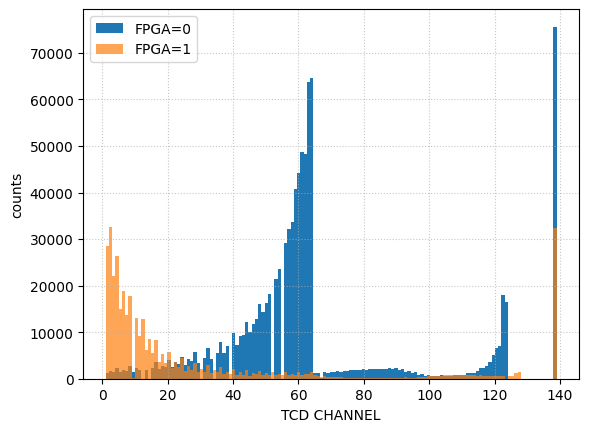

In [58]:
#PART 7
import matplotlib.pyplot as plt
df[df.FPGA==0]['TDC_CHANNEL'].hist(bins=df.TDC_CHANNEL.max(),label='FPGA=0')
df[df.FPGA==1]['TDC_CHANNEL'].hist(bins=df.TDC_CHANNEL.max(),label='FPGA=1',alpha=0.7)
plt.legend()
plt.xlabel('TCD CHANNEL')
plt.ylabel('counts')
plt.grid(linestyle=':',alpha=0.7)
plt.show()

In [44]:
#PART 8 Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)
count_ch=df.groupby(by='TDC_CHANNEL').size()
count_ch.sort_values(ascending=False).head(3)

TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64

In [56]:
#PART 9  Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139
#uniq_orb=df.groupby(by='ORBIT_CNT').nunique()
print(f'Number of unique orbits: {df["ORBIT_CNT"].nunique()}')
print(f'Number of unique orbits with at least one measurement from TDC_CHANNEL=139: {df[df.TDC_CHANNEL==139]["ORBIT_CNT"].nunique()}')

Number of unique orbits: 11001
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 10976


Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method

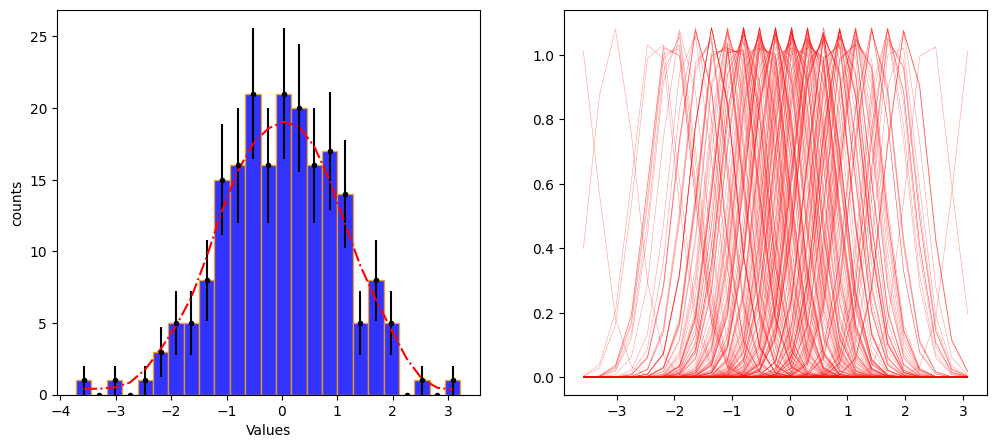

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapezoid
fig,ax=plt.subplots(1,2,figsize=(12,5))
a=np.random.normal(0,1,200)
counts,bin_edg,_=ax[0].hist(a,bins=25,color='blue',edgecolor='orange',alpha=0.8)
ax[0].set_xlabel('Values')
ax[0].set_ylabel('counts')
err=np.sqrt(counts)
dist=np.diff(bin_edg)
bin_cen=bin_edg[:-1]+dist/2
ax[0].errorbar(bin_cen,counts,yerr=err,color='k',fmt='.')
g=np.zeros(len(bin_cen))
for val in a:
    gauss=norm(val,1.06*len(a)**(-1/5))
    ax[1].plot(bin_cen,gauss.pdf(bin_cen),color='r',linewidth=0.4,alpha=0.4)
    g+=gauss.pdf(bin_cen)
g=g*trapezoid(counts,bin_cen)/trapezoid(g,bin_cen)
ax[0].plot(bin_cen,g,c='r',linestyle='-.')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

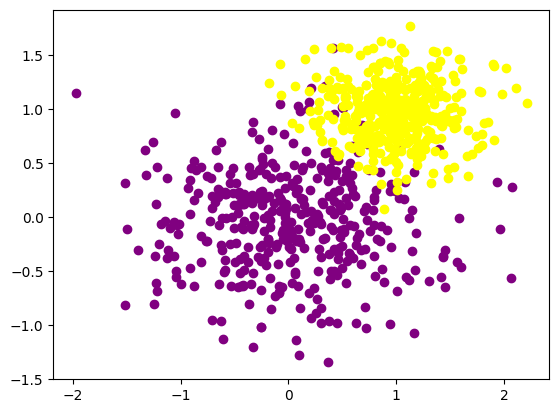

In [25]:
import numpy as np
import matplotlib.pyplot as plt
cl_1=np.random.multivariate_normal([0,0],[[0.5,0],[0,0.2]],400)
cl_2=np.random.multivariate_normal([1,1],[[0.15,0],[0,0.08]],400)
#print(cl_1)
plt.scatter(cl_1[:,0],cl_1[:,1],color='purple')
plt.scatter(cl_2[:,0],cl_2[:,1],color='yellow')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
data=np.load('/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/residuals_261.npy',allow_pickle=True)
df=pd.DataFrame(data.item())
df_new=df[np.abs(df.residuals)<2]
df_new

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [3]:
res=linregress(df_new['distances'],df_new['residuals'])


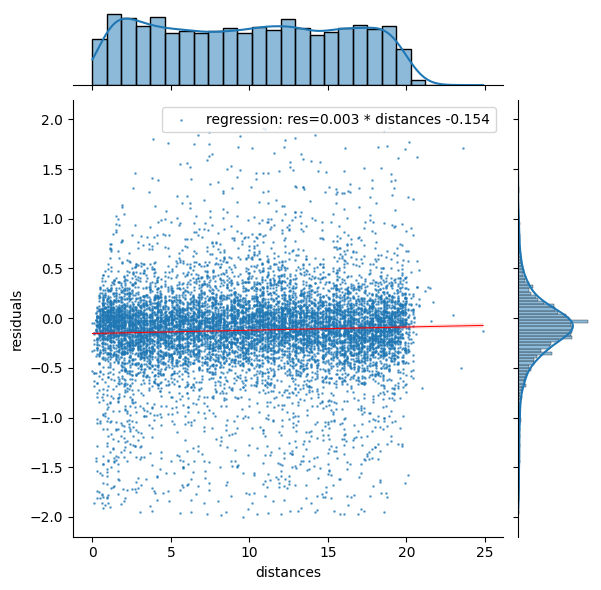

In [6]:
sns.jointplot(x='distances',y='residuals',data=df_new, kind='reg',scatter_kws={'s':0.8,'alpha':0.6},line_kws={'color':'r','linewidth':0.7})
plt.legend([f'regression: res={res.slope:.3f} * distances {res.intercept:.3f}'])

/tmp/ipykernel_148533/567994430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['distances_bins']=pd.cut(df_new['distances'],bins=bins)
/tmp/ipykernel_148533/567994430.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=df_new.groupby('distances_bins')['residuals']


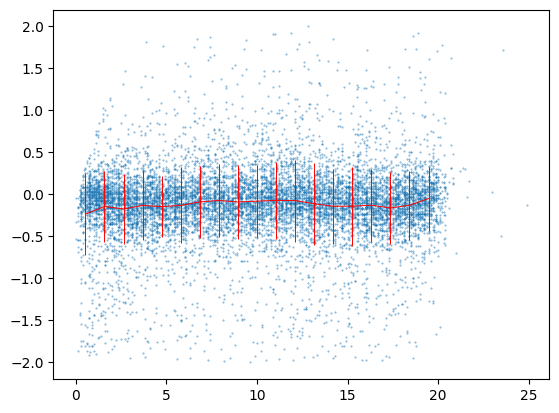

In [31]:
#* Fill 3 numpy arrays
#  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
#  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
#  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
#* Plot the profile plot on top of the scatter plot
bins=np.linspace(0,20,20)
x=bins[:-1]+np.diff(bins)/2
df_new['distances_bins']=pd.cut(df_new['distances'],bins=bins)
grouped=df_new.groupby('distances_bins')['residuals']
y=grouped.mean()
erry=grouped.std()
plt.scatter(df_new.distances,df_new.residuals,marker='.',s=0.8,alpha=0.6)
plt.errorbar(x,y,yerr=erry,color='r',linewidth=0.7)
plt.show()

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.

In [140]:
import numpy as np
from scipy import linalg as la
x1=np.random.normal(0,1,1000)
x2=x1+np.random.normal(0,3,len(x1))
x3=2*x1+x2
cov=np.cov([x1,x2,x3],rowvar=True)
w,vr=la.eig(cov)
u,s,vh=la.svd(cov)
print(f'Eigenvalues are {w} and their eigenvectors are {vr}')
print(f'With SVD eigenvalues are {s**2} and their eigenvectors are {vh}')
variance_ratio=s**2/np.sum(s**2)*100
print(f'Variance ratio {variance_ratio.real}')
print(np.array([x1, x2, x3]))
red_data = np.array([x1, x2, x3]).T[:,np.cumsum(variance_ratio)<99+1]
print(f'reduced data: {red_data}')
rot_data=np.dot(vh,np.array([x1, x2, x3]))

Eigenvalues are [2.58010001e+01+0.j 9.54741024e-17+0.j 2.00776961e+00+0.j] and their eigenvectors are [[-0.11788867 -0.81649658  0.56518634]
 [-0.57432039 -0.40824829 -0.70956988]
 [-0.81009774  0.40824829  0.42080279]]
With SVD eigenvalues are [6.65691604e+02 4.03113882e+00 3.32855448e-30] and their eigenvectors are [[-0.11788867 -0.57432039 -0.81009774]
 [ 0.56518634 -0.70956988  0.42080279]
 [-0.81649658 -0.40824829  0.40824829]]
Variance ratio [9.93980884e+01 6.01911592e-01 4.97004845e-31]
[[ 0.3547881  -0.99857935 -0.54334368 ...  0.17006426 -1.38737564
  -0.32442024]
 [ 5.4060528  -3.60291177  0.61303432 ...  0.5948622  -0.87081904
  -7.43090572]
 [ 6.11562899 -5.60007048 -0.47365303 ...  0.93499073 -3.64557032
  -8.07974619]]
reduced data: [[ 3.54788097e-01]
 [-9.98579354e-01]
 [-5.43343677e-01]
 [ 2.89176292e-01]
 [ 1.23993351e-01]
 [-6.70724358e-01]
 [ 9.23777136e-01]
 [-3.47051386e-01]
 [-1.30303119e+00]
 [ 1.88119668e+00]
 [ 1.94447088e+00]
 [-5.94621548e-01]
 [ 1.53527494e-

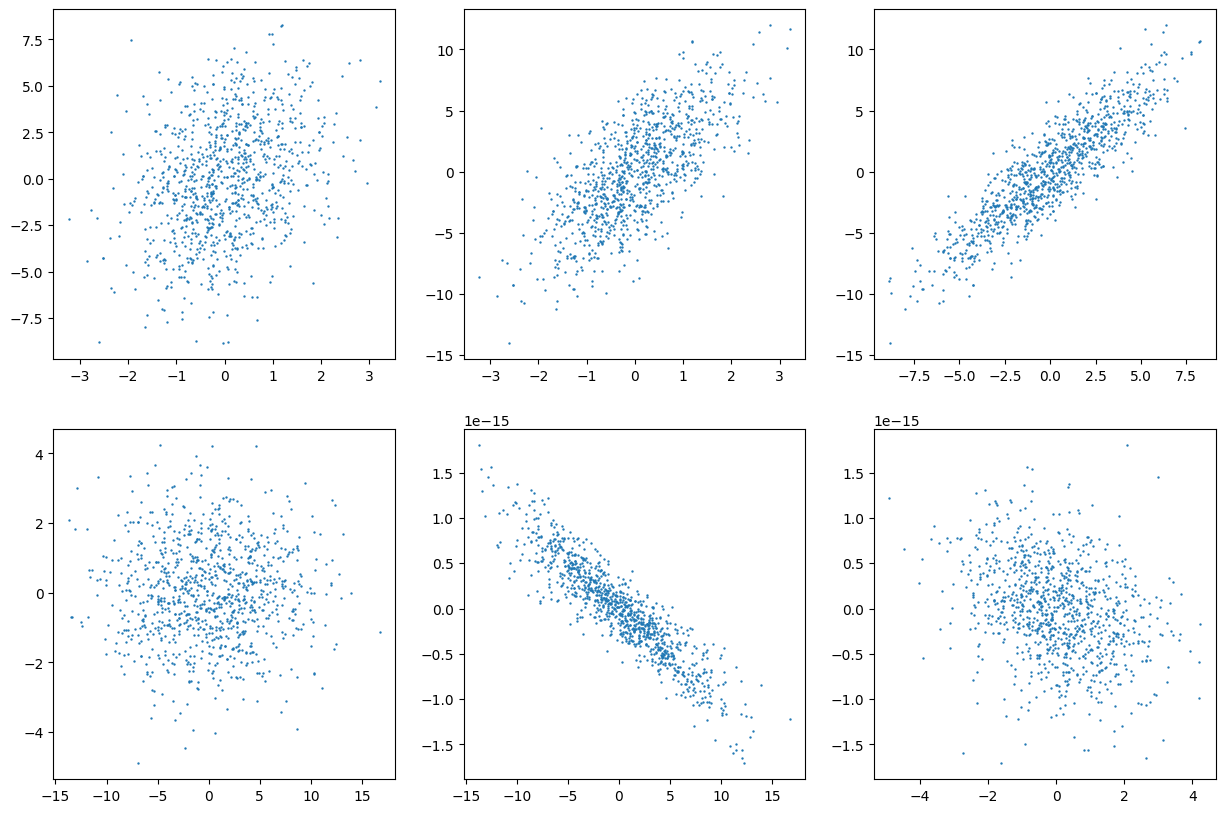

In [150]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(2,3,figsize=(15,10))
ax[0,0].scatter(x1,x2,marker='.',s=2)
ax[0,1].scatter(x1,x3,marker='.',s=2)
ax[0,2].scatter(x2,x3,marker='.',s=2)
ax[1,0].scatter(rot_data[0],rot_data[1],marker='.',s=2)
ax[1,1].scatter(rot_data[0],rot_data[2],marker='.',s=2)
ax[1,2].scatter(rot_data[1],rot_data[2],marker='.',s=2)

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.

Primary component that matters: [9.99999663e-01 8.21569889e-04 0.00000000e+00]

[8.35838054 0.23291285 0.        ]


/tmp/ipykernel_148533/2406055303.py:45: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('x','y',data=data,linewidth=0.4)


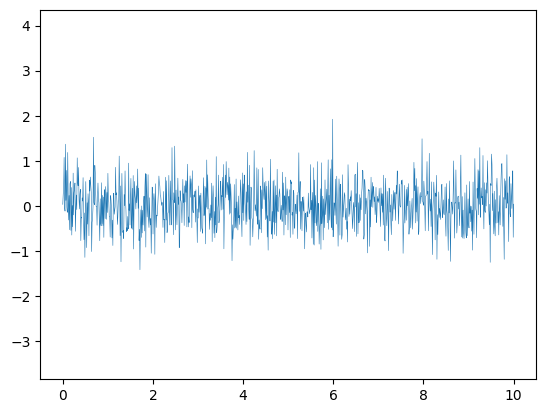

In [152]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import linalg as la

num_samples = 1000
x_data = np.linspace(0, 10, num_samples)

noise = np.random.normal(0, 0.5, num_samples) 
data=pd.DataFrame({'x':x_data,'y':noise,'z':np.zeros(num_samples)})

phis = np.linspace(0, np.pi, 6)
thetas = np.linspace(0, 2*np.pi, 6)

def R(phi, theta):
    return np.array([[np.cos(theta), np.sin(theta), 0],
                     [-np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]])

rotated_datasets = []
for phi in phis:
    for theta in thetas:
        rotated_data = np.dot(data.values, R(phi,theta))  # Convertire in array numpy per la moltiplicazione
        rotated_datasets.append(rotated_data)

pca_results_rot = []
for dataset in rotated_datasets:
    pca = PCA()
    pca.fit(dataset)
    pca_results_rot.append(pca.components_)  # Salvare i componenti principali per ogni dataset rotato

# Calcolare i componenti principali medi
princ_components = np.mean(pca_results_rot, axis=0)

# Normalizzare i componenti principali
normalized_princ_components = princ_components[0] / la.norm(princ_components[0])

print(f'Primary component that matters: {normalized_princ_components}\n')

# Interpretare gli autovalori (varianza spiegata)
eig_val = pca.explained_variance_
print(eig_val)

plt.plot('x','y',data=data,linewidth=0.4)
plt.axis('equal')
plt.show()

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)

In [198]:
import numpy as np
from scipy.interpolate import UnivariateSpline
max_speeds = np.load('/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/max-speeds.npy')
years_nb = max_speeds.shape[0]
print(years_nb)
cprob=np.arange(1,years_nb+1)/(years_nb+1)
#print(np.sort(max_speeds),cprob)
quantile_func=UnivariateSpline(cprob,np.sort(max_speeds))
fifty_prob=1.-0.02
fifty_wind=quantile_func(fifty_prob)
print(f'Max wind: {fifty_wind}')


21
Max wind: 32.97989844019469


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

(array([ 6.74123107,  2.15122118, 22.10419782]), array([[ 6.71620303e-03,  1.29088058e-05, -5.76576258e-05],
       [ 1.29088058e-05,  6.77823917e-03, -3.47808227e-02],
       [-5.76576258e-05, -3.47808227e-02,  5.32575026e-01]]))


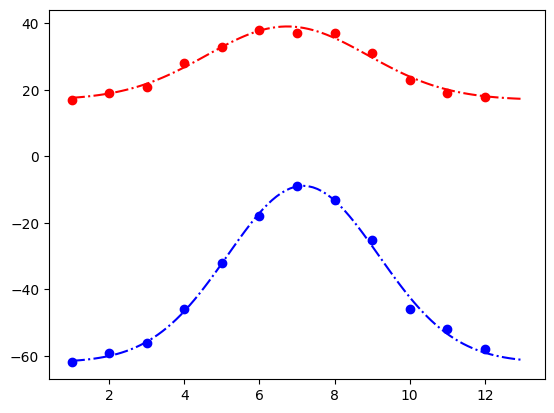

In [230]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tmax=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
tmin=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months=np.arange(1,13)
plt.scatter(months,tmax,color='r')
plt.scatter(months,tmin,color='b')
def gauss(data,m,std,amp):
    return amp*np.exp(-(data-m)**2/(2*std**2))
t1=curve_fit(gauss,months,tmax-np.min(tmax))
t2=curve_fit(gauss,months,tmin-np.min(tmin))
print(t1)
#print(tmax-np.min(tmax))
x=np.linspace(1,13,100)
plt.plot(x,gauss(x,*t1[0])+np.min(tmax),linestyle='-.',color='r')
plt.plot(x,gauss(x,*t2[0])+np.min(tmin),linestyle='-.',color='b')

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


Res1:[ 0.08984201 -0.71265642] with val -1.031628453489874, res3:[-0.08984202  0.71265641] with val -1.0316284534898768, res3:[0. 0.] with val 0.0. But [0,0] is a saddle point.


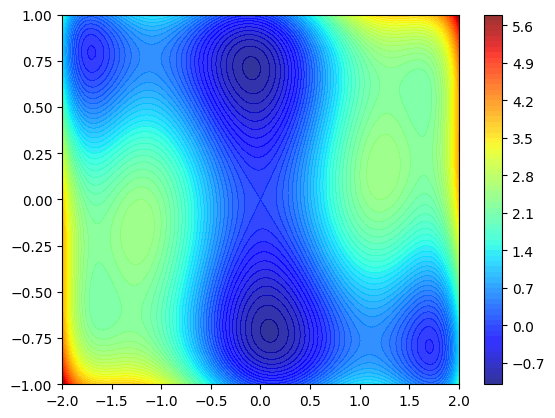

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


def f(vec):
    x,y=vec
    return (4-2.1*x**2+x**4/3)*x**2+x*y+(4*y**2-4)*y**2
x=np.linspace(-2,2,1000)
y=np.linspace(-1,1,1000)
grid=np.meshgrid(x,y)
plt.contourf(*grid,f(grid),70,alpha=0.8,cmap='jet')
plt.colorbar()
min1=minimize(f,[0,-0.75])
min2=minimize(f,[0,0.75])
min3=minimize(f,[0,0])
print(f'Res1:{min1.x} with val {min1.fun}, res3:{min2.x} with val {min2.fun}, res3:{min3.x} with val {min3.fun}. But [0,0] is a saddle point.')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

([], [])

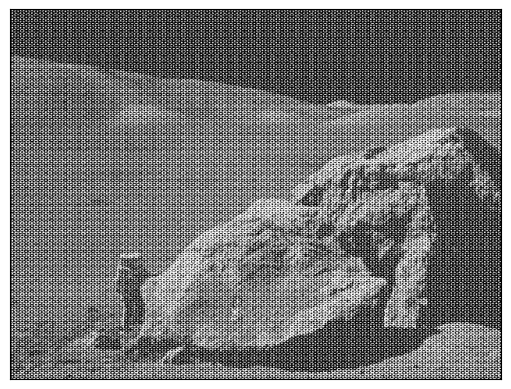

In [278]:
import matplotlib.pyplot as plt
from scipy import fftpack
import pylab
name='/mnt/c/Users/utente/Desktop/Physics of data/Laboratory of computational physics/MOD A/LaboratoryOfComputationalPhysics_Y6/moonlanding.png'
image=pylab.imread(name)
plt.imshow(image,'gray')
plt.xticks([])
plt.yticks([])

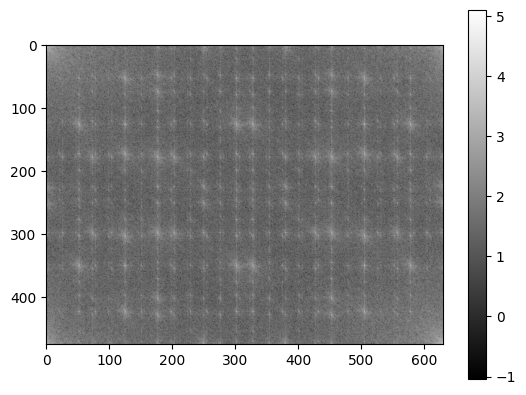

In [326]:
spectrum=fftpack.fft2(image)
plt.imshow(np.log10(np.abs(spectrum)),'gray')
plt.colorbar()
rows,cols=spectrum.shape
spectrum[int(0.1*rows):int(0.9*rows),:]=0
spectrum[:,int(0.1*cols):int(0.9*cols)]=0
new_image=fftpack.ifft2(spectrum).real

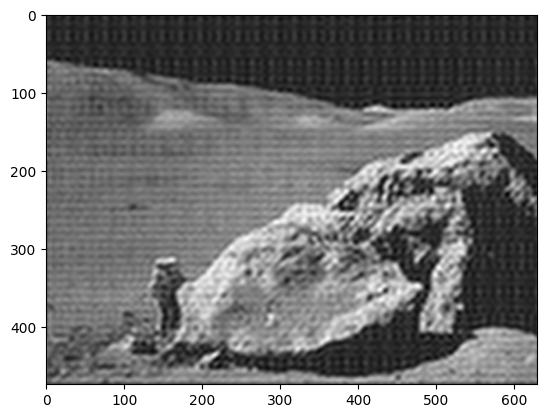

In [327]:
new_image = fftpack.ifft2(spectrum).real
plt.imshow(new_image, 'gray')

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

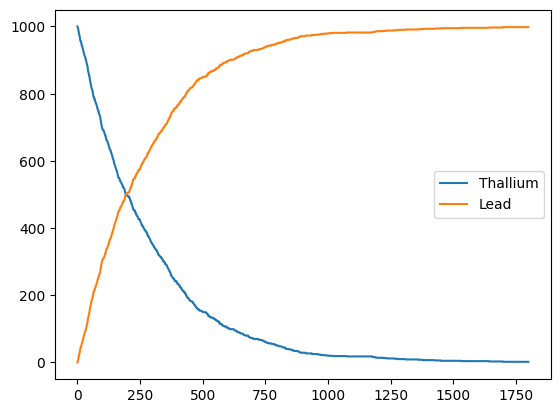

[3.7709067  3.75666001 3.74246715 ... 0.00419148 0.00417564 0.00415987]


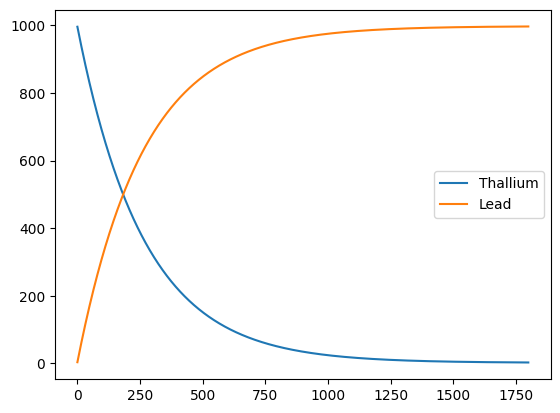

In [363]:
import numpy as np
import matplotlib.pyplot as plt
half_life=3.052*60
dt=1
initial_tl=1000
initial_pb=0
def prob(t):
    return 1-2**(-t/half_life)
tl=[initial_tl]
pb=[initial_pb]
for t in np.arange(1,1800,dt): 
    dec_at=np.sum(np.random.random(tl[-1])<prob(dt))
    tl.append(tl[-1]-dec_at)
    pb.append(pb[-1]+dec_at)
plt.plot(np.arange(1800),tl,label='Thallium')
plt.plot(np.arange(1800),pb,label='Lead')
plt.legend()
plt.show()
######################################
def distr(t):
    return 2**(-t/half_life)*np.log(2)/half_life
times=np.arange(1,1801,dt)
probabilities=distr(times)
dec=probabilities*initial_tl*dt
print(dec)
tl=[initial_tl]
pb=[initial_pb]
tl_atoms=initial_tl-np.cumsum(dec)
pb_atoms=np.cumsum(dec)

plt.plot(np.arange(1800),tl_atoms,label='Thallium')
plt.plot(np.arange(1800),pb_atoms,label='Lead')
plt.legend()

    


2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [443]:
import numpy as np
from scipy.constants import physical_constants as cons
Z=79
e=cons['elementary charge'][0]
eps_0=cons['vacuum electric permittivity'][0]
E=7.7e6*e
a0=cons['Bohr radius'][0]
sig=a0/100
N=int(1e7)
def theta(b):
    return 2*np.arctan(Z*e**2/(2*np.pi*eps_0*E*b))
mean=np.array([0,0])
cov=np.array([[sig**2,0],[0,sig**2]])
beam_profile=np.random.multivariate_normal(mean,cov,N)
b=np.linalg.norm(beam_profile,axis=1)
print(f'Fraction of bounced back particles:{np.sum(theta(b)>=(np.pi/2))/N:.5f}')



Fraction of bounced back particles:0.00159


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Area with hit/miss method:1.45138396 with error 0.0009403268759319147
Area with mean_value method:1.4510500667989694 with error 0.00016675353060749838


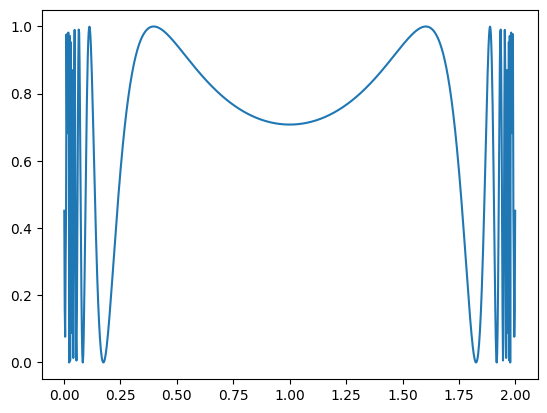

In [402]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.sin(1/(x*(2-x)))**2
a=0
b=2
x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x))
N=int(1e7)
hit_miss=[]
for i in range(5):
    x_sample=np.random.uniform(a,b,N)
    y_sample=np.random.uniform(0,1,N)
    hit_miss.append(2*np.sum(y_sample<f(x_sample))/N)
x_sample=np.random.uniform(a,b,N)
mean=(b-a)/N*np.sum(f(x_sample))
std=(b-a)*np.sqrt(np.var(f(x_sample)))/np.sqrt(N)
print(f'Area with hit/miss method:{np.mean(hit_miss)} with error {3*np.std(hit_miss)}')
print(f'Area with mean_value method:{mean} with error {std}')

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere

In [403]:
import numpy as np
def ins_circ(x,y):
    return x**2+y**2<=1
N=int(1e7)
x_sample=np.random.uniform(-1,1,size=N)
y_sample=np.random.uniform(-1,1,size=N)
integral=4*np.sum(ins_circ(x_sample,y_sample))/N
print(f'Area circle:{integral}')
def sphere_vol(dim,N):
    x=np.random.uniform(-1,1,size=(N,dim))
    points_inside=np.sum(np.linalg.norm(x,axis=1)<=1)
    return np.power(2.,dim) * points_inside/N
dim=10
print(f'Volume of a dimension {dim} sphere of radius 1:{sphere_vol(dim,N)}')
    

Area circle:3.1421468
Volume of a dimension 10 sphere of radius 1:2.548736


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [368]:
import numpy as np
def f(x):
    return x**(-1/2)/(np.exp(x)+1)
a=0
b=1
def w(x):
    return 1/np.sqrt(x)
N=int(1e7)
integral_w=2*(np.sqrt(b)-np.sqrt(a))
x=np.random.uniform(a,b,N)**2
integral=1/N*np.sum(f(x)/w(x))*integral_w
print(f'Integral={integral}')

Integral=0.8389085918422049
